### CASE 1 Visualize the Experiment Result

In [1]:
from cornac.metrics_explainer.exp_experiment import Explainers_Experiment
from cornac.datasets.goodreads import prepare_data
from cornac.metrics_explainer import Metric_Exp_DIV as DIV, Metric_Exp_FPR as FPR, Metric_Exp_FA as FA, Metric_Exp_RA as RA
from cornac.models import EFM, MTER
from cornac.explainer import Exp_EFM, Exp_MTER
from cornac.experiment import Visualization

rs_sent_dense = prepare_data(data_name="goodreads", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
fdiv = DIV()
fpr = FPR()
fpr_with_input_as_groundtruth = FPR(fpath="../cornac/datasets/good_reads/goodreads_sentiment_full.txt")
efm = EFM(max_iter=20, num_explicit_factors=50, num_latent_factors=50, num_most_cared_aspects=50, alpha=0.85,lambda_h=0.1, lambda_u=0.001, lambda_v=0.01, lambda_x=1.0, lambda_y= 0.1)
efm_exp = Exp_EFM(rec_model=efm, dataset=rs_sent_dense.train_set)
mter = MTER(max_iter=20, n_aspect_factors=8, n_item_factors=5, n_opinion_factors= 5, n_user_factors= 10, lambda_bpr=10, lambda_reg= 10, n_bpr_samples=1000, n_element_samples=50)
mter_exp = Exp_MTER(rec_model=mter, dataset=rs_sent_dense.train_set)

models = [(efm, efm_exp), (mter, mter_exp)]
metrics = [fdiv, fpr_with_input_as_groundtruth]
experiment = Explainers_Experiment(eval_method=rs_sent_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)
experiment.run()

/Users/yaoyao/miniconda3/envs/rose/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3419.64it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.5759092425754598
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  20%|██        | 1800/9000 [00:03<00:14, 504.91it/s] 


Result: Feature Precision: 0.37476877543470216; Feature Recall: 0.01949771148938378; Harmonic Mean: 0.036328754940829294
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3882.60it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.11387721054397242
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


/Users/yaoyao/miniconda3/envs/rose/lib/python3.9/site-packages/cornac-2.0.0-py3.9-macosx-11.1-arm64.egg/cornac/metrics_explainer/exp_experiment.py:183: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  (precision, recall, ff1), (precision_d, rec

Result: Feature Precision: 0.45089285714285715; Feature Recall: 0.2733605971587934; Harmonic Mean: 0.2899635112576339
experiment data: [[0.5759092425754598, 0.036328754940829294, 0.06747984886169434, 6.513827085494995], [0.11387721054397242, 0.2899635112576339, 0.07258796691894531, 3.0080599784851074]]


recommender:explainer |      Metric_Exp_DIV |       Metric_Exp_FPR |            Train(s) |        Evaluate(s)
EFM:Exp_EFM           |  0.5759092425754598 | 0.036328754940829294 | 0.06747984886169434 |  6.513827085494995
MTER:Exp_MTER         | 0.11387721054397242 |   0.2899635112576339 | 0.07258796691894531 | 3.0080599784851074



=======Start Visualization=======
Plot the bar chart for the metrics:


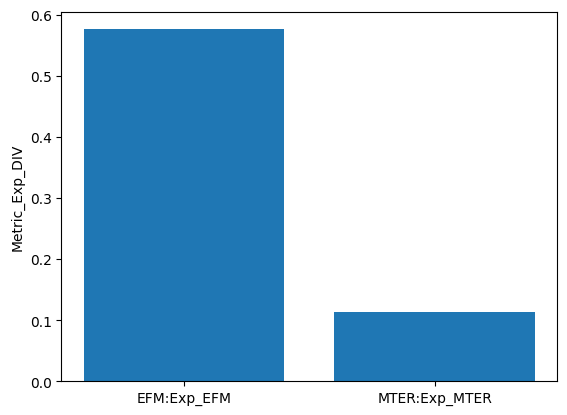

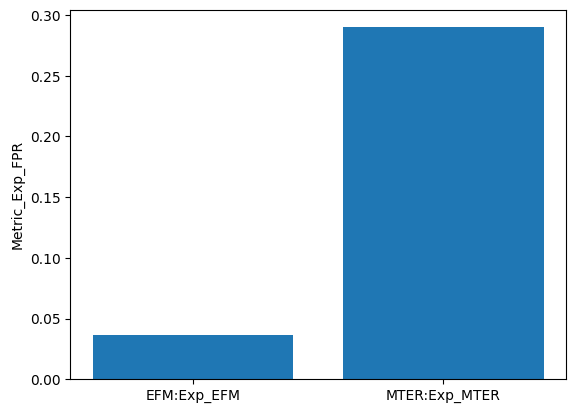

Plot the bar chart for the cost:
=======Visualization Done=======


In [2]:
vis = Visualization()
vis.visualize_experiemnt_result(experiment)

### CASE 2 Visualize the Effect of Parameters' Change (rec_k, feature_k)
Problem:
    - Explainaer_Experiment(models = [model_1, model_2], rec_k=10, feature_k = 10) fixed parameter for all models/explainers 
Solution:
    - Pass a list of Explainer_Experiment Object to func Visualization_Parameter_Change([EE_1, EE_2, EE_3], param_name = 'rec_k/feature_k')